          gene  species  nb_exons  nb_hits  no_event  fusion  fission  \
0         A1CF  1868482        10      301       300       0        0   
1          A2M  1868482        26      470       466       0        0   
2        A2ML1  1868482        25      388       382       0        0   
3       A4GALT  1868482         3       74        15       0       59   
4        A4GNT  1868482         2       33        33       0        0   
...        ...      ...       ...      ...       ...     ...      ...   
596629  ZYG11A     9606        14      417       346       5        0   
596630  ZYG11B     9606        15      455       407      10        5   
596631     ZYX     9606        10      310       292       2       13   
596632   ZZEF1     9606        55     1756      1702       2        0   
596633    ZZZ3     9606        16      487       466       4        0   

        full_duplication  others  total_number_genes  
0                      0       1               15420  
1            

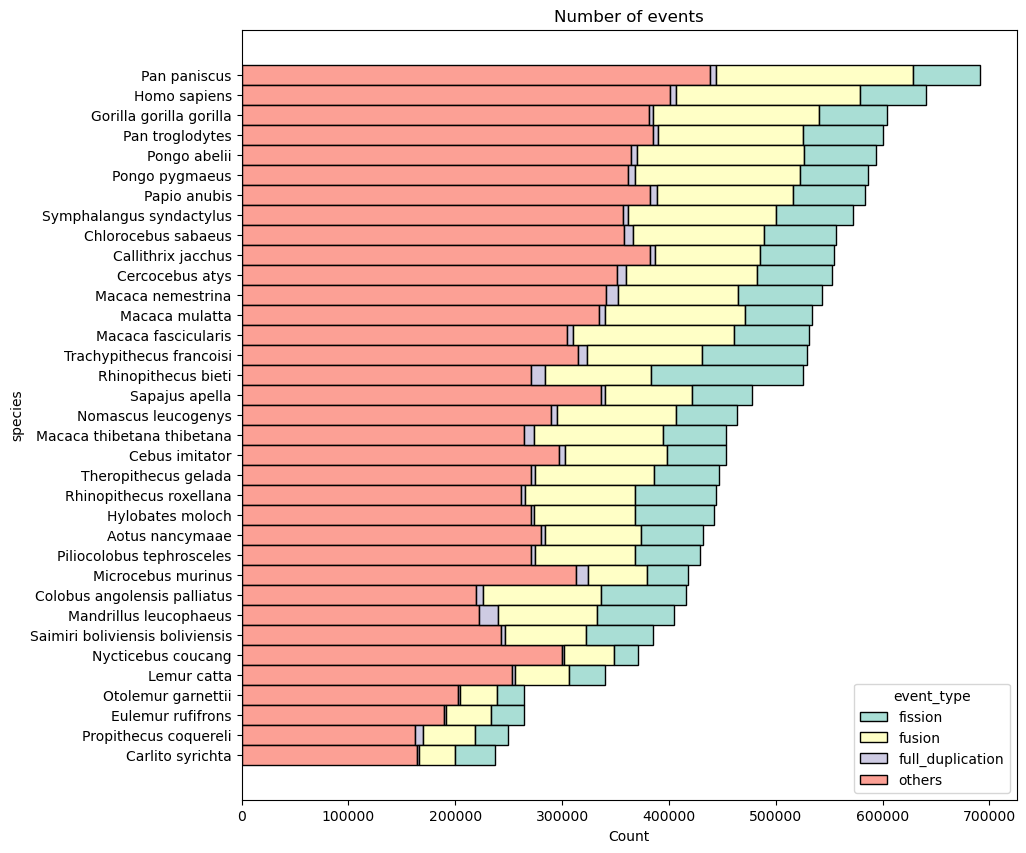

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#complete table
df_all = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/all_species_df.tsv', sep='\t')

#create a gene column
df_all['gene']=df_all['gene'].apply(lambda x: x.split('_')[-2])
total_genes_per_species = df_all.groupby('species')['gene'].nunique()
df_all['total_number_genes']= df_all['species'].map(total_genes_per_species)

#associate taxonomy id with species anmes
df_table= pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv', sep='\t')
genid_species = dict(zip(df_table['Organism Taxonomic ID'].astype(str), df_table['Organism Name'].astype(str)))  #dictionary containing tuples (genome_id/specie_name)

#turn table into explicit table
event_columns = ['fission', 'fusion', 'full_duplication', 'others'] 
df_all[event_columns] = df_all[event_columns].fillna(0) 
df_long = df_all.melt(id_vars=['gene', 'species', 'nb_exons'], value_vars=event_columns, var_name='event_type', value_name='event_count')
df_long['species'] = df_long['species'].astype(str).map(genid_species)

#order the species in the graph
species_order = df_long.groupby('species')['event_count'].sum().sort_values(ascending=False).index
df_long['species'] = pd.Categorical(df_long['species'], categories=species_order, ordered=True)

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df_long, y="species", hue="event_type", weights="event_count", bins=35, multiple="stack", palette="Set3")
plt.title('Number of events')
plt.tight_layout
plt.savefig('/home/collot/stage_git/figures/all_events.png', bbox_inches='tight')

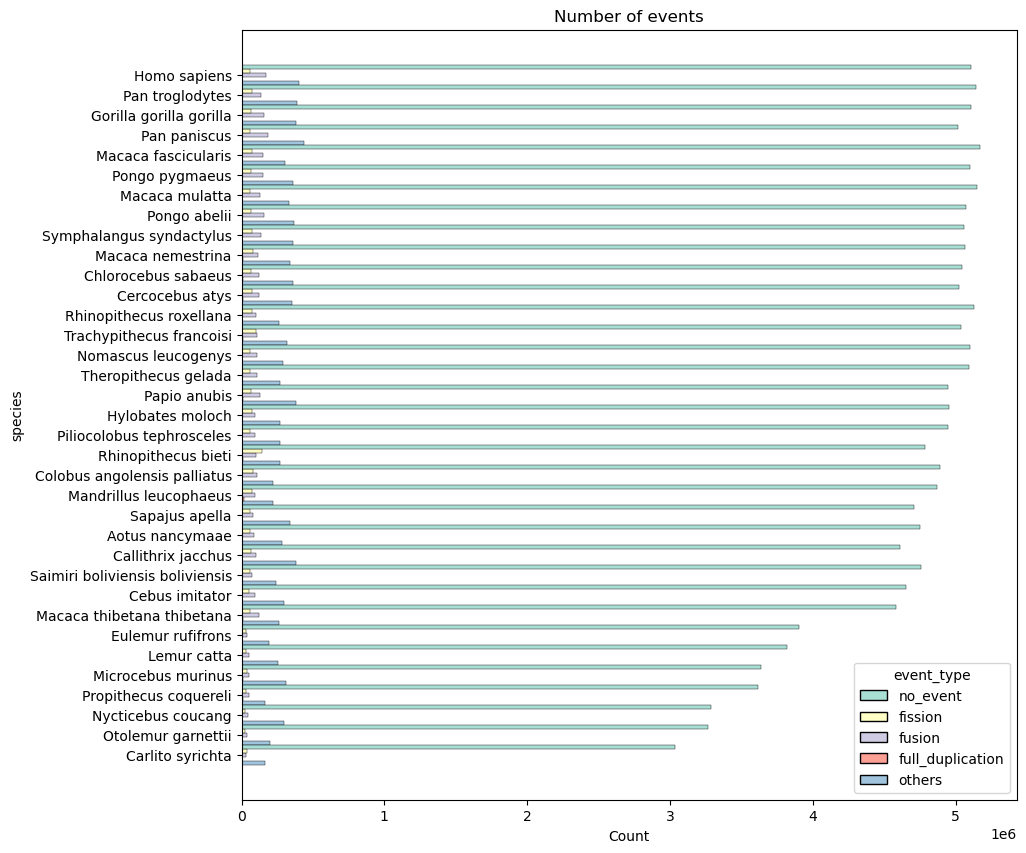

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#complete table
df_all = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/all_species_df.tsv', sep='\t')

#create a gene column
df_all['gene']=df_all['gene'].apply(lambda x: x.split('_')[-2])
total_genes_per_species = df_all.groupby('species')['gene'].nunique()
df_all['total_number_genes']= df_all['species'].map(total_genes_per_species)

#associate taxonomy id with species anmes
df_table= pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv', sep='\t')
genid_species = dict(zip(df_table['Organism Taxonomic ID'].astype(str), df_table['Organism Name'].astype(str)))  #dictionary containing tuples (genome_id/specie_name)

#turn table into explicit table
event_columns = ['no_event','fission', 'fusion', 'full_duplication', 'others'] 
df_all[event_columns] = df_all[event_columns].fillna(0) 
df_long = df_all.melt(id_vars=['gene', 'species', 'nb_exons'], value_vars=event_columns, var_name='event_type', value_name='event_count')
df_long['species'] = df_long['species'].astype(str).map(genid_species)

#order the species in the graph
species_order = df_long.groupby('species')['event_count'].sum().sort_values(ascending=False).index
df_long['species'] = pd.Categorical(df_long['species'], categories=species_order, ordered=True)

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df_long, y="species", hue="event_type", weights="event_count", bins=35, multiple="dodge", palette="Set3")
plt.title('Number of events')
plt.tight_layout
plt.savefig('/home/collot/stage_git/figures/all_events_no_event.png', bbox_inches='tight')

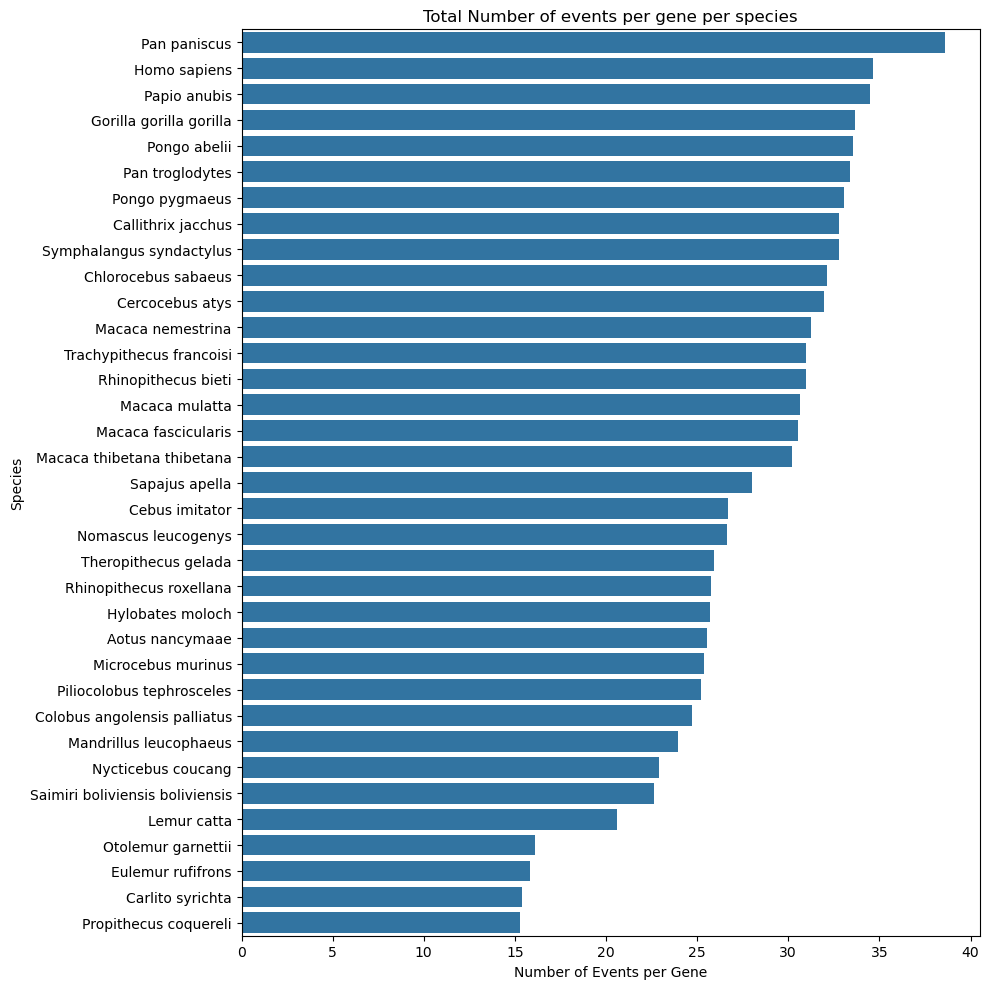

In [38]:
df_all = pd.read_csv('/home/collot/stage/collot/collot/out_ortho/all_species_df.tsv', sep='\t')

#create a gene column
df_all['gene']=df_all['gene'].apply(lambda x: x.split('_')[-2])
total_genes_per_species = df_all.groupby('species')['gene'].nunique()
df_all['total_number_genes']= df_all['species'].map(total_genes_per_species)
df_all['total_events'] = df_all[event_columns].sum(axis=1)
total_events_per_species = df_all.groupby('species')['total_events'].sum()

# Calculate the ratio of total events to total genes
df_all['species_name'] = df_all['species'].astype(str).map(genid_species)
df_all = df_all.drop_duplicates(subset=['species']) 
df_all['events_per_gene'] = df_all['species'].map(total_events_per_species) / df_all['total_number_genes']

# Order species by the ratio
df_all = df_all.sort_values(by='events_per_gene', ascending=False)

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df_all, y="species_name", x="events_per_gene")
plt.title('Total Number of events per gene per species')
plt.xlabel('Number of Events per Gene')
plt.ylabel('Species')
plt.tight_layout()
plt.savefig('/home/collot/stage_git/figures/total_events_per_gene.png', bbox_inches='tight')
plt.show()

In [ ]:
df_one_to_one = pd.read_csv('', sep='\t')
df_one_to_one['gene']=df_one_to_one['gene'].apply(lambda x: x.split('_')[-2])
total_genes_per_species = df_one_to_one.groupby('species')['gene'].nunique()
df_one_to_one['total_number_genes']= df_one_to_one['species'].map(total_genes_per_species)

#associate taxonomy id with species anmes
df_table= pd.read_csv('/home/collot/stage/collot/PrimateData/PrimateInfo.csv', sep='\t')
genid_species = dict(zip(df_table['Organism Taxonomic ID'].astype(str), df_table['Organism Name'].astype(str)))  #dictionary containing tuples (genome_id/specie_name)

#turn table into explicit table
event_columns = ['no_event','fission', 'fusion', 'full_duplication', 'others'] 
df_one_to_one[event_columns] = df_one_to_one[event_columns].fillna(0) 
df_long =df_one_to_one.melt(id_vars=['gene', 'species', 'nb_exons'], value_vars=event_columns, var_name='event_type', value_name='event_count')
df_long['species'] = df_long['species'].astype(str).map(genid_species)

#order the species in the graph
species_order = df_long.groupby('species')['event_count'].sum().sort_values(ascending=False).index
df_long['species'] = pd.Categorical(df_long['species'], categories=species_order, ordered=True)

# Plot the histogram
fig, ax = plt.subplots(figsize=(10, 10))
sns.histplot(data=df_long, y="species", hue="event_type", weights="event_count", bins=35, multiple="dodge", palette="Set3")
plt.title('Number of events')
plt.tight_layout
plt.savefig('/home/collot/stage_git/figures/oto_events.png', bbox_inches='tight')